# Workshop 3

## Linear Regression - Electricity Bill Price Predictor

### 1) Importing Data

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

#1) IMPORTING DATA ----------------------------------------------------------------------
data = pd.read_csv('/content/data.csv')

#df is data frame

df = pd.DataFrame(data)
df.head()

# print(df.shape)


,Usage,Number of Days,Usage per day,Charge,Read Type,Average Temperature,Season
0,896,31,28.90,231.65,Normal Read,54.2,Spring
1,941,29,32.45,242.07,Normal Read,44.2,Winter
2,1140,31,36.77,288.26,Normal Read,37.1,Winter
3,1205,31,38.87,303.33,Normal Read,33.4,Winter
4,997,31,32.16,255.08,Normal Read,38.3,Winter


### 2) Data Handling/Preprocessing

In [10]:
#2.1) Removing Outliers
#Explanation: Since we are trying to build a line, outliers in the data can directly affect the
#calucations for the line, so we need to remove them first

print("Original Shape:", df.shape)

Q1 = df['Charge'].quantile(0.25)
Q3 = df['Charge'].quantile(0.75)
IQR = Q3 - Q1

outlier = []

for index, price in df['Charge'].items():
    if price > (Q3 + 1.5*IQR) or price < (Q1 - 1.5*IQR):
        outlier.append(index)

Q1 = df['Usage'].quantile(0.25)
Q3 = df['Usage'].quantile(0.75)
IQR = Q3 - Q1

for index, area in df['Usage'].items():
    if area > (Q3 + 1.5*IQR) or area < (Q1 - 1.5*IQR):
        outlier.append(index)

# DROP OUTLIERS FROM DATA HERE

#axis = 0 is refrering to a row
#axis = 1 removes columns
df.drop(outlier, axis= 0, inplace= True)

print("Shape after Removing the Outliers:", df.shape)


#2.2) Removing Unnecessary Columns
#Explanation: Sometimes, some columns in our Data may not place a huge difference in the result,
#and this allows us to remove them to avoid more work or bad results


# CODE HERE

removed_columns = ['Read Type', 'Number of Days']
df.drop(columns= removed_columns, axis= 1, inplace= True)

print("Shape after removing unnecessary Column(s):", df.shape)


#2.3) Encoding Categorical Features
#Explanation: In a Machine Learning Model, we can't work with categirical data (words like "yes" and "no"),
# that's why we need to turn them into numbers (like 1 and 0)

categorical_columns = []

#Let's first get all the columns that have strings instead of numbers
for column in df:
    if df[column].dtype == object:
        categorical_columns.append(column)

# CODE HERE TO ENCODE THE STRINGS
le = LabelEncoder()

for categorical in categorical_columns:
    df[categorical] = le.fit_transform(df[categorical])



#2.4) Splitting the Data into Training Data and Testing Data

# CODE HERE

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 42)



#2.5) Scaling Our Data
#Explanation: some features have different ranges of values like one going from 100_000 to 1_000_000, and
#another feature going from 0 to 1 only! So we adjust these values to put them in the SAME scale! Otherwise,
#our model can be very biased

scaler = MinMaxScaler()

# Apply scaler() to all the columns
scale_columns = ['Usage','Usage per day',
                 'Charge', 'Average Temperature', 'Season']

# CODE HERE
df_train[scale_columns] = scaler.fit_transform(df_train[scale_columns])
df_test[scale_columns] = scaler.fit_transform(df_test[scale_columns])

df_train.head()


Original Shape: (120, 7)
Shape after Removing the Outliers: (108, 7)
Shape after removing unnecessary Column(s): (108, 5)


,Usage,Usage per day,Charge,Average Temperature,Season
70,0.029565,0.050756,0.053834,0.350948,0.0
28,0.075652,0.205759,0.224340,0.281991,1.0
24,0.907826,0.634456,0.677926,0.628910,0.0
36,0.830435,1.000000,1.000000,0.340758,0.0
52,0.488696,0.246462,0.267027,0.319431,0.0


### 3) Training Data

In [11]:
#3) TRAINING DATA -----------------------------------------------------------------------

model= LinearRegression()

# CODE HERE

x_train = df_train.drop(columns='Charge') #get features
y_train = df_train['Charge'] #get target

model.fit(x_train, y_train)


LinearRegression()

### 4) Predicting Data

In [12]:
#4) PREDICTING DATA ---------------------------------------------------------------------
x_test = df_test.drop(columns='Charge')
y_test = df_test['Charge']

y_prediction = model.predict(x_test)



### 5) Model Evaluation

r^2 Score = 0.9800304611442122
Mean Squared Error = 0.0016069891812786452


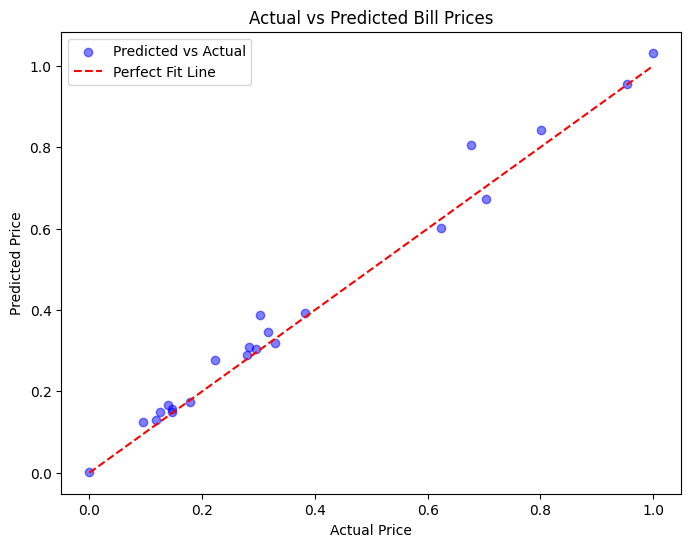

In [13]:
r2 = r2_score(y_test, y_prediction)
print("r^2 Score =", r2)

mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared Error =", mse)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_prediction, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Bill Prices")
plt.legend()
plt.show()

## Neural Network - Electricity Bill Price Predictor

### 1) Importing Data & Preprocessing Data

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

#1) IMPORTING DATA ----------------------------------------------------------------------
data = pd.read_csv('/content/data.csv')

df = pd.DataFrame(data)

#2) DATA HANDLING -----------------------------------------------------------------------

#2.1) Removing Outliers
#Explanation: Since we are trying to build a line, outliers in the data can directly affect the
#calucations for the line, so we need to remove them first

print("Original Shape:", df.shape)


Q1 = df['Charge'].quantile(0.25)
Q3 = df['Charge'].quantile(0.75)
IQR = Q3 - Q1

outlier = []

for index, price in df['Charge'].items():
    if price > (Q3 + 1.5*IQR) or price < (Q1 - 1.5*IQR):
        outlier.append(index)

Q1 = df['Usage'].quantile(0.25)
Q3 = df['Usage'].quantile(0.75)
IQR = Q3 - Q1

for index, area in df['Usage'].items():
    if area > (Q3 + 1.5*IQR) or area < (Q1 - 1.5*IQR):
        outlier.append(index)

df.drop(outlier, axis= 0, inplace= True)

print("Shape after Removing the Outliers:", df.shape)

#2.2) Removing Unnecessary Columns
#Explanation: Sometimes, some columns in our Data may not place a huge difference in the result,
#and this allows us to remove them to avoid more work or bad results

removed_columns = ['Read Type', 'Number of Days']

df.drop(columns= removed_columns, axis= 1, inplace= True)
print("Shape after removing unnecessary Column(s):", df.shape)

#2.3) Encoding Categorical Features
#Explanation: In a Machine Learning Model, we can't work with categirical data (words like "yes" and "no"),
# that's why we need to turn them into numbers (like 1 and 0)

categorical_columns = []

#Let's first get all the columns that have strings instead of numbers
for column in df:
    if df[column].dtype == object:
        categorical_columns.append(column)

le = LabelEncoder()

for categorical in categorical_columns:
    df[categorical] = le.fit_transform(df[categorical]) #Turning Yes/No into 1/0

#2.4) Splitting the Data into Training Data and Testing Data

#In this case, 80% of the whole data will be training data and 20% will be testing data
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 42)

Original Shape: (120, 7)
Shape after Removing the Outliers: (108, 7)
Shape after removing unnecessary Column(s): (108, 5)


### 2) Building Neural Network

In [15]:
def init_params(n_x):
    """
    Initializes parameters for the neural network.
    n_x: number of input features (should be 11 for the dataset)
    """
    hidden_units = 12  # Number of neurons in the hidden layer
    W1 = np.random.rand(hidden_units, n_x) - 0.5  # Shape: (12, n_x)
    b1 = np.random.rand(hidden_units, 1) - 0.5      # Shape: (12, 1)
    W2 = np.random.rand(1, hidden_units) - 0.5      # Output layer: (1, 12)
    b2 = np.random.rand(1, 1) - 0.5                 # Single output neuron
    return W1, b1, W2, b2

def sigmoid(Z):
    Z = np.clip(Z, -500, 500)  # Prevents overflow
    return 1 / (1 + np.exp(-Z))

def deriv_sigmoid(Z):
    s = sigmoid(Z)
    return s * (1 - s)

def forward_prop(W1, b1, W2, b2, X):
    """
    Forward propagation:
    - X has shape (num_features, num_samples)
    - Z1 = W1.dot(X) + b1 will have shape (12, num_samples)
    """
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)  # Hidden layer activation
    Z2 = W2.dot(A1) + b2  # Output layer (linear activation for regression)
    A2 = Z2  # Raw output
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]  # number of samples
    dZ2 = A2 - Y  # For regression using MSE loss derivative
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_sigmoid(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    # For regression, return the raw output.
    return A2

def get_mse(predictions, Y):
    mse = mean_squared_error(Y.flatten(), predictions.flatten())
    print(f"Mean Squared Error: {mse:.2f}")
    return mse

def gradient_descent(X, Y, alpha, iterations):
    n_x = X.shape[0]  # number of features (11)
    W1, b1, W2, b2 = init_params(n_x)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print(f"Iteration {i}:")
            predictions = get_predictions(A2)
            get_mse(predictions, Y)
    return W1, b1, W2, b2


### 3) Training Neural Network

In [17]:
x_train = df_train.drop(columns=['Charge'], axis=1)
y_train = df_train['Charge']

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train = scaler_x.fit_transform(x_train)

# Reshape `y_train` into a 2D array before scaling
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Transpose so that:
# X has shape (num_features, num_samples) and Y has shape (1, num_samples)
X = x_train.T  # Now shape should be (11, number_of_samples)
Y = y_train.reshape(1, -1)

# --- Training ---

# CODE HERE THE WEIGTHS AND BIASES

W1, b1, W2, b2 = gradient_descent(X, Y, alpha= 0.08, iterations= 8000)

Iteration 0:
Mean Squared Error: 1.11
Iteration 10:
Mean Squared Error: 0.80
Iteration 20:
Mean Squared Error: 0.65
Iteration 30:
Mean Squared Error: 0.52
Iteration 40:
Mean Squared Error: 0.41
Iteration 50:
Mean Squared Error: 0.33
Iteration 60:
Mean Squared Error: 0.26
Iteration 70:
Mean Squared Error: 0.21
Iteration 80:
Mean Squared Error: 0.18
Iteration 90:
Mean Squared Error: 0.15
Iteration 100:
Mean Squared Error: 0.13
Iteration 110:
Mean Squared Error: 0.12
Iteration 120:
Mean Squared Error: 0.11
Iteration 130:
Mean Squared Error: 0.10
Iteration 140:
Mean Squared Error: 0.09
Iteration 150:
Mean Squared Error: 0.08
Iteration 160:
Mean Squared Error: 0.08
Iteration 170:
Mean Squared Error: 0.07
Iteration 180:
Mean Squared Error: 0.07
Iteration 190:
Mean Squared Error: 0.06
Iteration 200:
Mean Squared Error: 0.06
Iteration 210:
Mean Squared Error: 0.05
Iteration 220:
Mean Squared Error: 0.05
Iteration 230:
Mean Squared Error: 0.05
Iteration 240:
Mean Squared Error: 0.04
Iteration 2

### 4) Predicting Data

In [19]:
# --- Preparing the Test Data ---
x_test = df_test.drop(columns=['Charge'], axis=1)
y_test = df_test['Charge']

# Use the SAME SCALERS from training (scaler_x and scaler_y)
x_test = scaler_x.transform(x_test)  # Use transform, NOT fit_transform!
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()  # Flatten for compatibility

# Transpose to match neural network input format
X_test = x_test.T  # Shape (num_features, num_samples)
Y_test = y_test.reshape(1, -1)  # Shape (1, num_samples)

# --- Making Predictions ---
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = 1 / (1 + np.exp(-Z1))  # Sigmoid activation
    Z2 = np.dot(W2, A1) + b2
    Y_pred = Z2  # Linear output (for regression)
    return Y_pred

# CODE HERE TO PREDICT OUR DATA
Y_pred_test = forward_propagation(X_test, W1, b1, W2, b2)


### 5) Neural Network Evaluation

Test Mean Squared Error: 0.03
R^2 Score: 0.9765


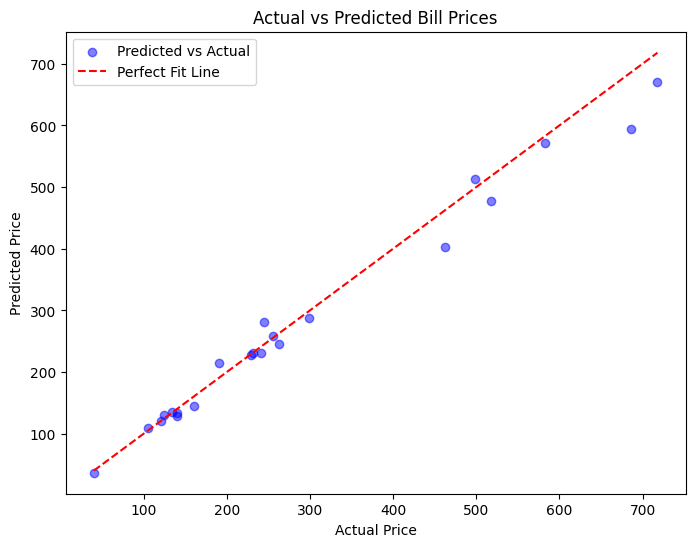

In [22]:
mse_test = np.mean((Y_pred_test - Y_test) ** 2)
print(f"Test Mean Squared Error: {mse_test:.2f}")

# Convert predictions back to original scale using scaler_y
y_test_original = scaler_y.inverse_transform(Y_test.T)  # Convert back to original prices
y_pred_original = scaler_y.inverse_transform(Y_pred_test.T)  # Convert back to original scale

# --- R^2 Score ---
r2 = r2_score(y_test_original, y_pred_original)
print(f"R^2 Score: {r2:.4f}")

# --- Visualization ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', linestyle='--', label="Perfect Fit Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Bill Prices")
plt.legend()
plt.show()